## SHO solver

In [64]:
import numpy as np
import scipy as sp
# import scipy.constants as const
import matplotlib.pyplot as plt

In [65]:
k, m = 1, 1
Vel = 0
x_0 = 1 # ampitude
N = 1000 # how many parts divided in this system.
t = 20 # how long is the system.
dt = 20 / N # a step length (time length)

In [66]:
def osci(x, v, k, m):
  '''
  This is the function (osci) defined in the [position, velocity] 
  and [derivative(position), derivative(velocity)]
  :param x: position
  :param v: velocity
  :param k: spring constants
  :param m: mass constant
  '''
  y, yder =  np.zeros(2), np.zeros(2)
  y[0] = x
  y[1] = v
  yder[0] = y[1]
  yder[1] = -y[0] * k/m # the difinition of the acceleration, which is depend on the position.
  
  return y, yder

In [67]:
def Eu(x_0, Vel, k, m, N):
        x, v = x_0, Vel
        yy = np.array([x, v], dtype = "float64")
        X = np.array([yy[0]])
        for i in range(N):
                yy += osci(yy[0], yy[1], k, m)[1] * dt
                
                X = np.append(X, yy[0])
                
        return X

In [68]:
def RK2(x_0, Vel, k, m, N):
        x, v = x_0, Vel
        yy = np.array([x, v], dtype = "float64")
        X = np.array([yy[0]])
        for i in range(N):
                k1 = osci(yy[0], yy[1], k, m)[1]
                y_temp = osci(yy[0], yy[1], k, m)[0] + dt * k1 
                k2 = osci(y_temp[0], y_temp[1], k, m)[1]
                
                yy += (dt / 2) * (k1 + k2)
                
                X = np.append(X, yy[0])

        return X


In [69]:
def RK4(x_0, Vel, k, m, N):
        x, v = x_0, Vel
        yy = np.array([x, v], dtype = "float64")
        X = np.array([yy[0]])
        for _ in range(N): # sometimes we can use _ instead of i because, in this case, "i" is not important.
                k1 = osci(yy[0], yy[1], k, m)[1]
                y_temp = osci(yy[0], yy[1], k, m)[0] + (dt/2) * k1 # temp for virtual step y*
                k2 = osci(y_temp[0], y_temp[1], k, m)[1]
                y_temp = osci(yy[0], yy[1], k, m)[0] + (dt/2) * k2
                k3 = osci(y_temp[0], y_temp[1], k, m)[1]
                y_temp = osci(yy[0], yy[1], k, m)[0] + dt * k3
                k4 = osci(y_temp[0], y_temp[1], k, m)[1]
                
                yy += (1/6) * dt * (k1 + 2*k2 + 2*k3 + k4)
                
                X = np.append(X, yy[0])
                
        return X

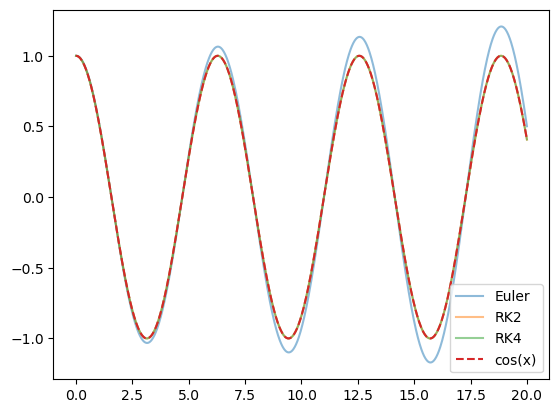

In [70]:
x = np.linspace(0, t, N + 1) # from 0 to t divided by N+1, i.e., N+1 equal parts.

plt.plot(x, Eu(x_0, Vel, k, m, N), label = "Euler", alpha = 0.5)
plt.plot(x, RK2(x_0, Vel, k, m, N), label = "RK2", alpha = 0.5)
plt.plot(x, RK4(x_0, Vel, k, m, N), label = "RK4", alpha = 0.5)

y = np.cos(x)
plt.plot(x, y, "--", label = "cos(x)") # theoretical solution.
plt.legend()